In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "../generate_data/label_embeddings.csv"
df = pd.read_csv(file_path)
labels = df['Label'].values
embeddings = df.drop(columns=['Label']).values
print(f"Label: {len(labels)}, embeddings with shape: {embeddings.shape}.")

Label: 854, embeddings with shape: (854, 100).


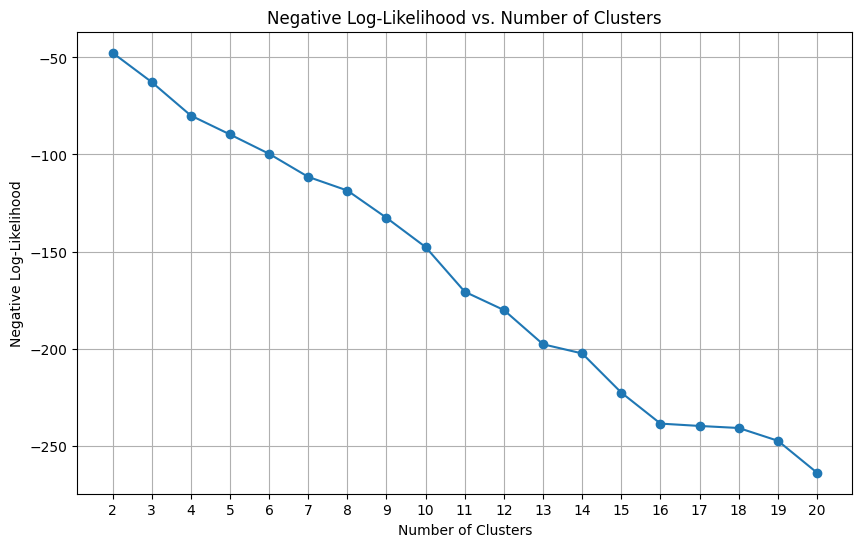

In [11]:
# 绘制SSE图， GMM 聚类数目评估
from sklearn.mixture import GaussianMixture
nll = []
for k in range(2,21):
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(embeddings)
    nll.append(-gmm.score(embeddings))  # 负对数似然
 
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), nll, marker='o')
plt.title('Negative Log-Likelihood vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Negative Log-Likelihood')
plt.xticks(range(2, 21))
plt.grid()
plt.show()


In [14]:
# 选择拐点作为最佳聚类数
optimal_k = 7
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 7


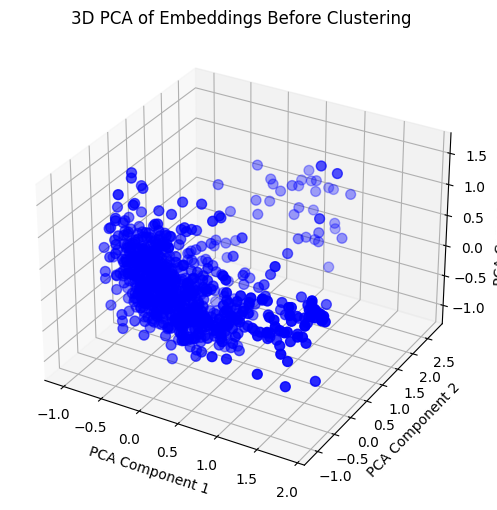

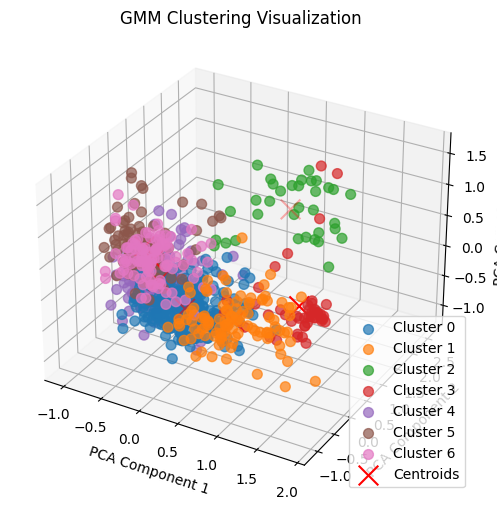

In [18]:
final_gmm = GaussianMixture(n_components=optimal_k, random_state=0)
final_gmm.fit(embeddings)
labels_gmm = final_gmm.predict(embeddings)

pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)
# 获取 GMM 中的簇中心
cluster_centers = final_gmm.means_
# 使用 PCA 降维到 3D
reduced_centers_3d = pca_3d.transform(cluster_centers)

# 聚类前的 3D 可视化
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2], s=50, c='blue')
ax.set_title('3D PCA of Embeddings Before Clustering')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

# 聚类后的 3D 可视化
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster_id in range(optimal_k):
    cluster_points = reduced_embeddings_3d[labels_gmm == cluster_id]
    ax.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        cluster_points[:, 2], 
        label=f"Cluster {cluster_id}", 
        s=50, alpha=0.7
    )

# 标记簇中心
ax.scatter(
    reduced_centers_3d[:, 0], 
    reduced_centers_3d[:, 1], 
    reduced_centers_3d[:, 2], 
    c='red', marker='x', s=200, label="Centroids"
)

ax.set_title("GMM Clustering Visualization")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()


In [19]:
# Create a DataFrame to hold the cluster labels
cluster_df = pd.DataFrame({
    'Label': labels,
    'Cluster': labels_gmm
})
# Save the DataFrame to a CSV file
output_file_path = "generate_data/label_embeddings_gmm.csv"
cluster_df.to_csv(output_file_path, index=False)
print(f"Cluster labels saved to {output_file_path}")

Cluster labels saved to generate_data/label_embeddings_gmm.csv
